In [1]:
from pathlib import Path

from forecasting_models.univariate_models.arima.model import ARIMAForecastModel

arima_model = ARIMAForecastModel(Path("__file__").parent / Path("examples/configs/arima/auto_arima_example.yaml"))

In [2]:
from data_utils.csv_utils import read_timeseries_csv

train_df = read_timeseries_csv(arima_model.config.data_path)

(3024, 1)

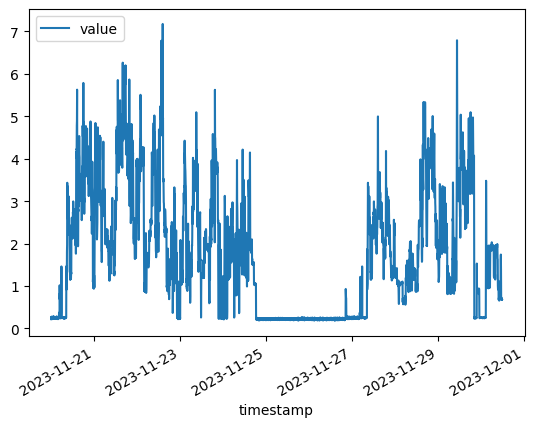

In [3]:
train_df.plot()
train_df.shape

In [4]:
arima_model.train()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3024
Model:               SARIMAX(5, 1, 4)   Log Likelihood               -1691.502
Date:                Thu, 02 May 2024   AIC                           3403.004
Time:                        16:38:20   BIC                           3463.144
Sample:                    11-20-2023   HQIC                          3424.628
                         - 11-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1525      0.084     -1.814      0.070      -0.317       0.012
ar.L2         -0.1419      0.062     -2.298      0.022      -0.263      -0.021
ar.L3         -0.0508      0.066     -0.771      0.441      -0.180       0.078
ar.L4          0.8109      0.058     13.955      0.000       0.697       0.925
ar.L5          0.1004      0.020      5.132      0.000       0.062       0.139
ma.L1         -0.0398      0.084     -0.473      0.636      -0.205       0.125
ma.L2          0.0588      0.080      0.731      0.465      -0.099       0.216
ma.L3         -0.0560      0.075     -0.741      0.459      -0.204       0.092
ma.L4         -0.8489      0.075    -11.337      0.000      -0.996      -0.702
sigma2         0.1794      0.002     79.302      0.000       0.175       0.184
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              6223.33
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
arima_model.order()

(5, 1, 4)

In [6]:
test_df = read_timeseries_csv("./examples/sample_data/univar_data/cpu_example_5min_TEST.csv")

<Axes: xlabel='timestamp'>

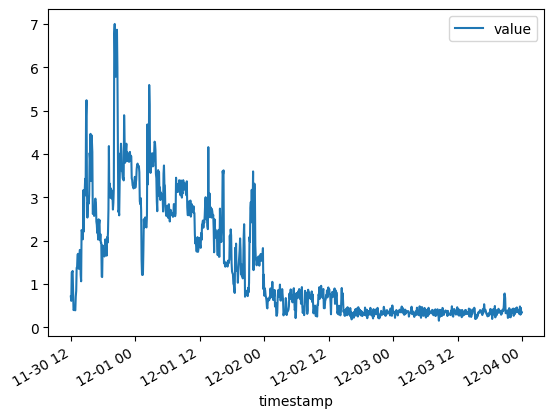

In [7]:
test_df.plot()

In [8]:
actuals, preds = arima_model.test(test_df)

In [9]:
test_eval_val, test_eval_df = arima_model.evaluate_test(
    actuals,
    preds,
    method="mse",
)

In [10]:
print(test_eval_val)

0.2869626871543376


In [11]:
print(test_eval_df)

                       actual  predicted      diff
2023-11-30 12:05:22  0.710193   0.720439 -0.010246
2023-11-30 12:10:22  0.610811   0.704587 -0.093775
2023-11-30 12:15:22  1.269129   0.756115  0.513015
2023-11-30 12:20:22  1.274023   0.817472  0.456551
2023-11-30 12:25:22  1.301465   0.831843  0.469622
...                       ...        ...       ...
2023-12-03 23:40:22  0.481985   0.324845  0.157140
2023-12-03 23:45:22  0.292546   0.337312 -0.044765
2023-12-03 23:50:22  0.450036   0.334466  0.115570
2023-12-03 23:55:22  0.322604   0.331565 -0.008961
2023-12-04 00:00:22  0.345922   0.337356  0.008566

[1008 rows x 3 columns]


In [12]:
anomaly_df = arima_model.flag_anomalies(actuals, preds, threshold_margin_size=10)

In [13]:
anomaly_count = len(anomaly_df[anomaly_df["is_anomaly"] == 1])
print(f"Anomaly count: {anomaly_count}")

Anomaly count: 0


In [14]:
from forecasting_models.general_plotter import GeneralPlotter

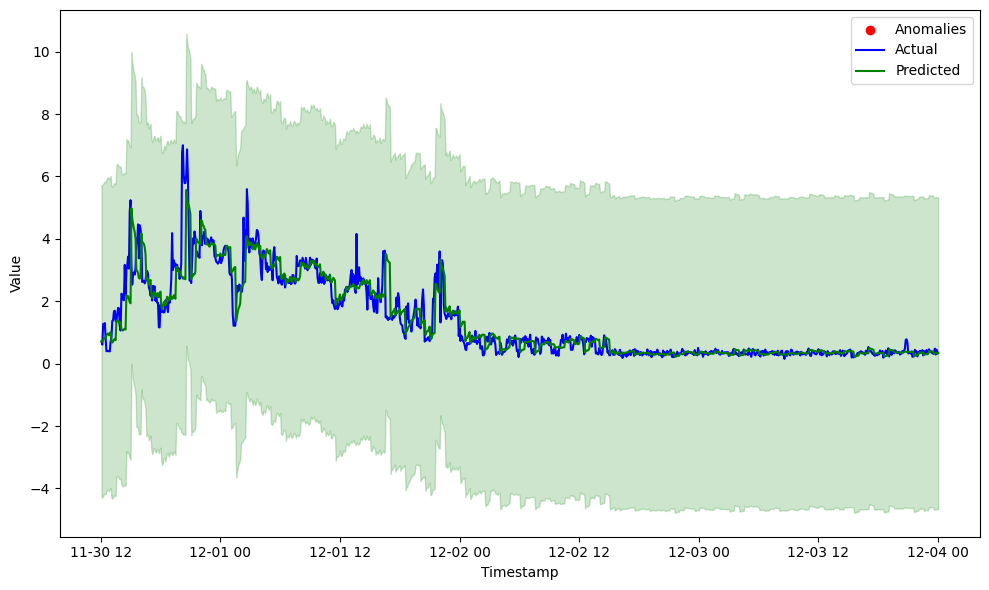

In [15]:
GeneralPlotter.plot_anomalies(anomaly_df, threshold_margin_size=5)

In [16]:
import pandas as pd

single_shot_preds = arima_model.predict(
        pd.Timestamp(test_df[arima_model.config.target_variable].index[0]) - pd.Timedelta(arima_model.config.preprocessing_parameters.dataset_timedelta)
    )

print(single_shot_preds)

2023-11-30 12:05:22    0.720439
2023-11-30 12:10:22    0.704587
2023-11-30 12:15:22    0.756115
2023-11-30 12:20:22    0.817472
2023-11-30 12:25:22    0.831843
2023-11-30 12:30:22    0.809248
Freq: 5min, dtype: float64


In [17]:
single_shot_eval_val, single_shot_eval_df = arima_model.evaluate_prediction(
    test_df[:arima_model.config.forecasting_parameters.forecast_horizon_size][arima_model.config.target_variable],
    method="mse",
)

In [18]:
print(single_shot_eval_val)

0.11687319309440419


In [19]:
print(single_shot_eval_df)

                       actual  predicted      diff
2023-11-30 12:05:22  0.710193   0.720439 -0.010246
2023-11-30 12:10:22  0.610811   0.704587 -0.093775
2023-11-30 12:15:22  1.269129   0.756115  0.513015
2023-11-30 12:20:22  1.274023   0.817472  0.456551
2023-11-30 12:25:22  1.301465   0.831843  0.469622
2023-11-30 12:30:22  0.796116   0.809248 -0.013132
